In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

In [206]:
class time_series:
    def __init__(self, pd_data):
        self.pd_data = pd_data

    def acf(self, nlags = None):
        if nlags is None:
            nlags = len(self.pd_data)
        acfv = sm.tsa.stattools.acf(self.pd_data, nlags= nlags)
        plt.stem(range(0,len(acfv)),acfv)

    def adf(self):
        result = adfuller(self.pd_data)

        print("ADF statistic: " + str(result[0]))
        print("p-value: " + str(result[1]))

        if result[1] <= 0.05:
            print("The time series is stationary.")
        else:
            print("The time series is not stationary.")

    def remove_trend(self):
        rolling_mean = self.pd_data.rolling(window=6).mean()
        data_no_trend = self.pd_data - rolling_mean
        return data_no_trend
    
    def remove_season(self):
        data_cleared = self.pd_data.diff(periods=6)
        data_cleared = data_cleared[data_cleared.notnull()]
        return data_cleared
        


Analyze Times series:
 1. Plot time series (give visual feedback)
 2. Calculate and plot ACF (give visual feedback)
 3. Check, if the time series is stationary (using Augmented Dickey-Fuller (ADF) test)
 4. If there is the trend - remove it from the Time Series
 5. Check seasonality (visually and using ACF)
 6. Run automatic ARIMA model determination. Find the best model, give summary and display the results (existing time range + future)

In [207]:
pass_data = pd.read_csv("AirPassengers.csv")
pass_data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


 1. Plot time series (give visual feedback)

In [208]:
pass_data['Month'] = pd.to_datetime(pass_data['Month'])
pass_data.set_index('Month', inplace=True)

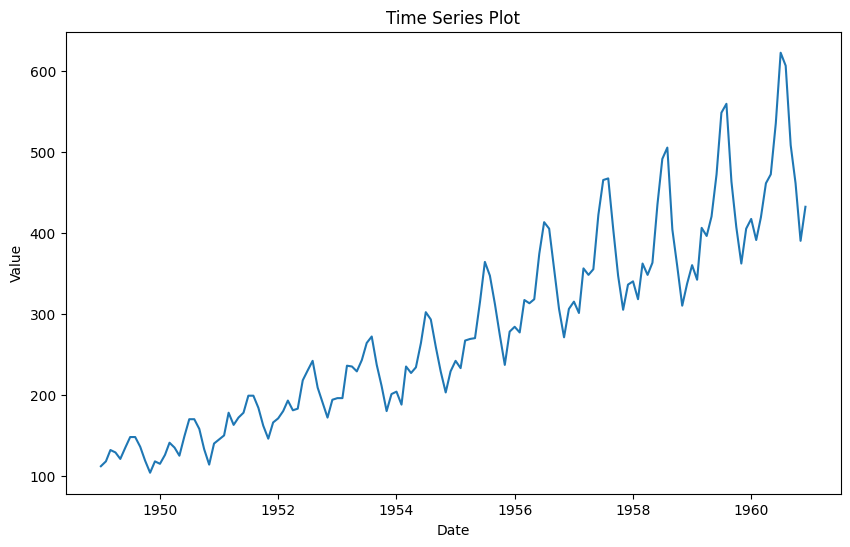

In [209]:
plt.figure(figsize=(10, 6))
plt.plot(pass_data['#Passengers'])
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [210]:
data = pass_data["#Passengers"]
data1 = time_series(data)

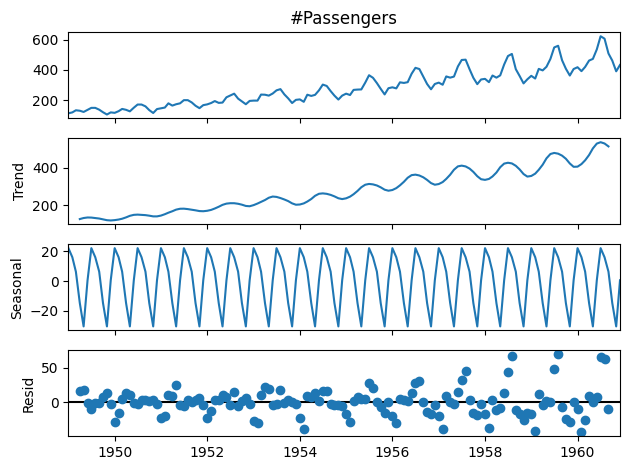

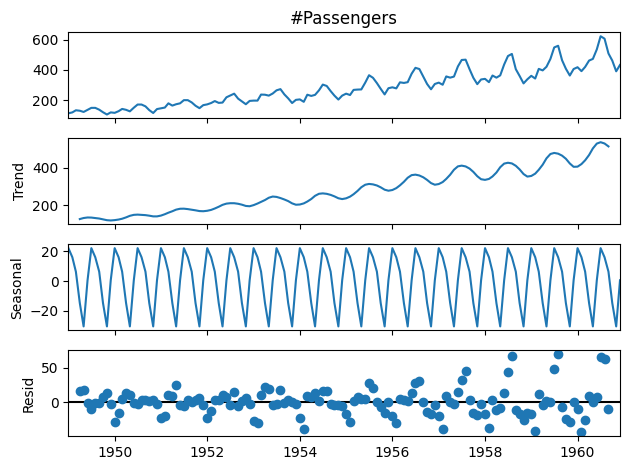

In [211]:
#visually it looks like there is a seasonality and trend
decomposition = seasonal_decompose(data,period=6)
decomposition.plot()

2. Calculate and plot ACF (give visual feedback)

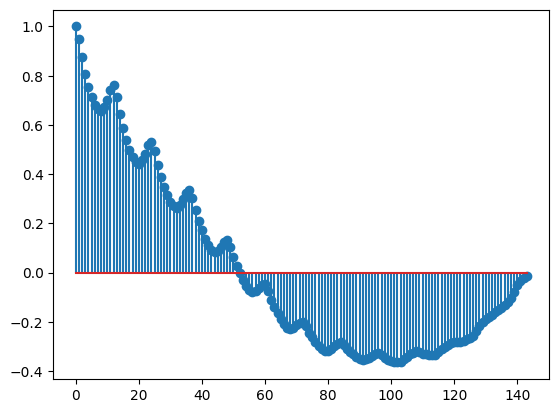

In [212]:
#in all acf calls, nlags can be specified (nlags = ...). By default, it is the len of df.
acf1 = data1.acf()

3. Check, if the time series is stationary (using Augmented Dickey-Fuller (ADF) test)

In [213]:
adf1 = data1.adf()

ADF statistic: 0.8153688792060498
p-value: 0.991880243437641
The time series is not stationary.


4. If there is the trend - remove it from the Time Series

<Axes: xlabel='Month'>

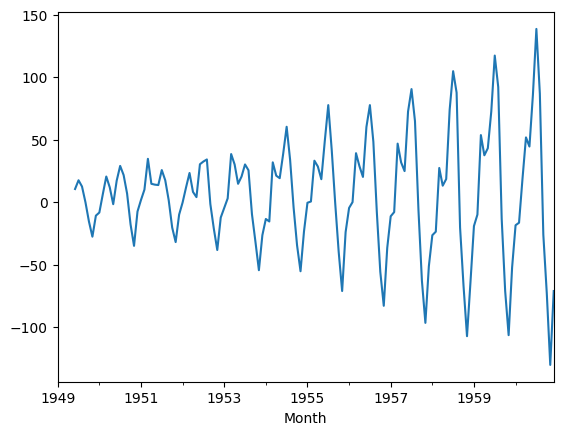

In [214]:
data_nt = data1.remove_trend()
data_nt.plot()

5. Check seasonality (visually and using ACF)

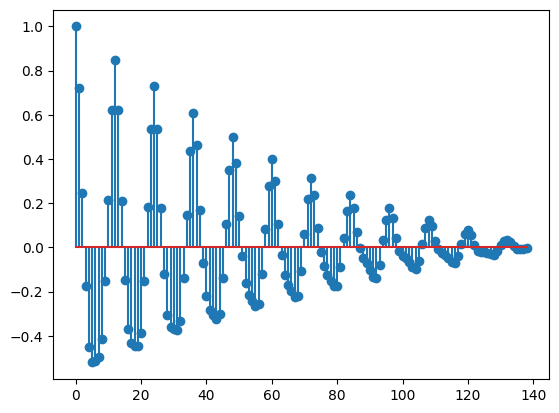

In [215]:
data_nt = data_nt[data_nt.notnull()]
data_nt = time_series(data_nt)
acf2 = data_nt.acf()

<Axes: xlabel='Month'>

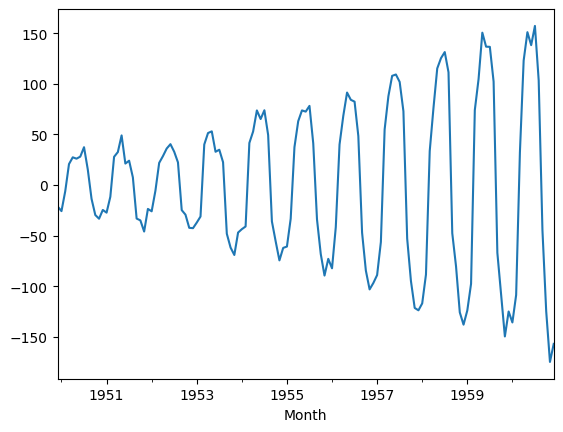

In [216]:
data_ns = data_nt.remove_season()
data_ns.plot()

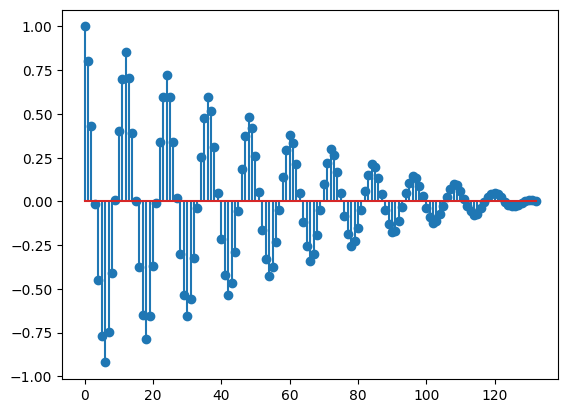

In [217]:
data_na = time_series(data_ns)
data_na.acf()

6. Run automatic ARIMA model determination. Find the best model, give summary and display the results (existing time range + future)

In [218]:
#using unmodified data
#also, my computer may not have enough power for this
model_org = auto_arima(data,trace=True,suppress_warnings=True)
results_org = model_org.fit(data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.32 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.20 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.05 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [219]:
#predictions
prediction_space_org = model_org.predict(n_periods = 30)

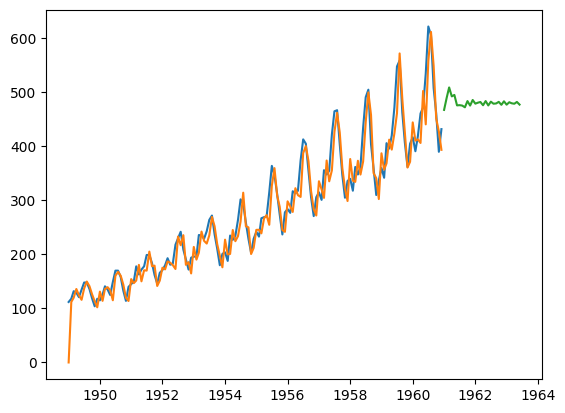

In [220]:
plt.plot(data)
plt.plot(results_org.fittedvalues())
plt.plot(prediction_space_org)

In [221]:
results_org.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  144
Model:               SARIMAX(4, 1, 3)   Log Likelihood                -674.913
Date:                Sun, 23 Jul 2023   AIC                           1365.825
Time:                        22:43:11   BIC                           1389.528
Sample:                    01-01-1949   HQIC                          1375.457
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5582      0.117     -4.782      0.000      -0.787      -0.329
ar.L2          0.4935      0.113      4.375      0.000       0.272       0.715
ar.L3          0.1238      0.128      0.970      0.332      -0.126       0.374
ar.L4         -0.5213      0.085     -6.136      0.000      -0.688      -0.355
ma.L1          0.9069      0.094      9.657      0.000       0.723       1.091
ma.L2         -0.5590      0.145     -3.866      0.000      -0.842      -0.276
ma.L3         -0.7385      0.109     -6.778      0.000      -0.952      -0.525
sigma2       724.1731     85.616      8.458      0.000     556.369     891.977
===================================================================================
Ljung-Box (L1) (Q):                   0.37   Jarque-Bera (JB):                14.59
Prob(Q):                              0.54   Prob(JB):                         0.00
Heteroskedasticity (H):               5.66   Skew:                             0.74
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.52
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The model looks fitted to the data (visually), however, the predictions are very static as opposed to the existing data. I think that such results are the product of overfitting - when the fitted values are very close/similar to the trained data, but such fit suits only the trained data itself. It works poorly on unknown data

In [222]:
#data with removed trend and seasonality
model = auto_arima(data_ns,trace=True,suppress_warnings=True)
results = model.fit(data_ns)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=1197.907, Time=0.56 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1540.196, Time=0.07 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1396.848, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1538.203, Time=0.03 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.29 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.41 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=1198.995, Time=2.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1366.188, Time=0.33 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.93 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.66 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.96 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1196.078, Time=0.51 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=inf, Time=0.43 sec
 ARIMA(

In [223]:
prediction_space = model.predict(n_periods = 30)

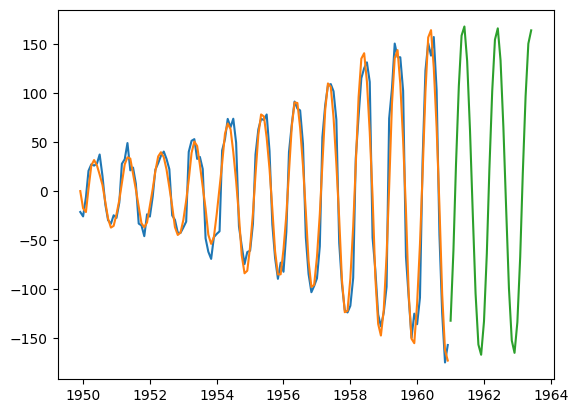

In [224]:
plt.plot(data_ns)
plt.plot(results.fittedvalues())
plt.plot(prediction_space)

In [225]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  133
Model:               SARIMAX(2, 0, 2)   Log Likelihood                -593.039
Date:                Sun, 23 Jul 2023   AIC                           1196.078
Time:                        22:43:28   BIC                           1210.530
Sample:                    12-01-1949   HQIC                          1201.951
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7321      0.006    284.126      0.000       1.720       1.744
ar.L2         -0.9975      0.004   -240.066      0.000      -1.006      -0.989
ma.L1         -1.5934      0.079    -20.111      0.000      -1.749      -1.438
ma.L2          0.7450      0.070     10.580      0.000       0.607       0.883
sigma2       412.1247     42.338      9.734      0.000     329.143     495.106
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 6.33
Prob(Q):                              0.96   Prob(JB):                         0.04
Heteroskedasticity (H):               7.27   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

This prediction, as opposed to the previous models, looks more promising. The predicted data follows the graph pattern. However, if I want to predict how many of passengers there will be in the future, it woudld be quite a process to "unprocess" the predicted values: to add back seasonality, trend... p-value (Prob) here is a lot higher than in the previous model.

<Axes: xlabel='Month'>

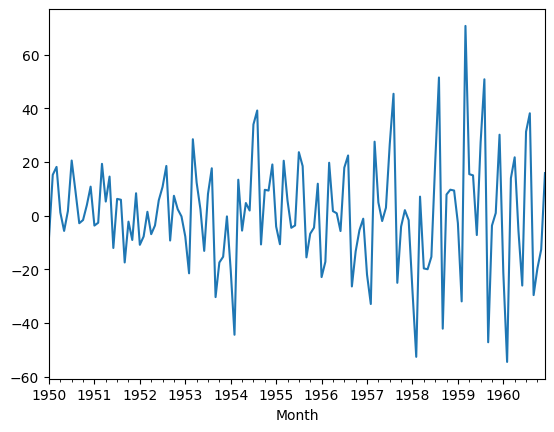

In [226]:
#check residuals
resid = results.resid()
resid = resid[1:]
resid.plot()

In [227]:
#no correlation
correlation_matrix = np.corrcoef(resid[:-1],resid[1:])
correlation_matrix

array([[ 1.        , -0.00283085],
       [-0.00283085,  1.        ]])

### My chosen data

In [228]:
alc_data = pd.read_csv('Alcohol_Sales.csv')
alc_data

,DATE,S4248SM144NCEN
0,1992-01-01,3459
1,1992-02-01,3458
2,1992-03-01,4002
3,1992-04-01,4564
4,1992-05-01,4221
...,...,...
320,2018-09-01,12396
321,2018-10-01,13914
322,2018-11-01,14174
323,2018-12-01,15504


In [229]:
alc_data = alc_data.rename(columns= {"S4248SM144NCEN": "sales"})
alc_data.columns

Index(['DATE', 'sales'], dtype='object')

In [230]:
alc_data['DATE'] = pd.to_datetime(alc_data['DATE'])
alc_data.set_index('DATE', inplace=True)

In [231]:
alc_data

,sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221
...,...
2018-09-01,12396
2018-10-01,13914
2018-11-01,14174


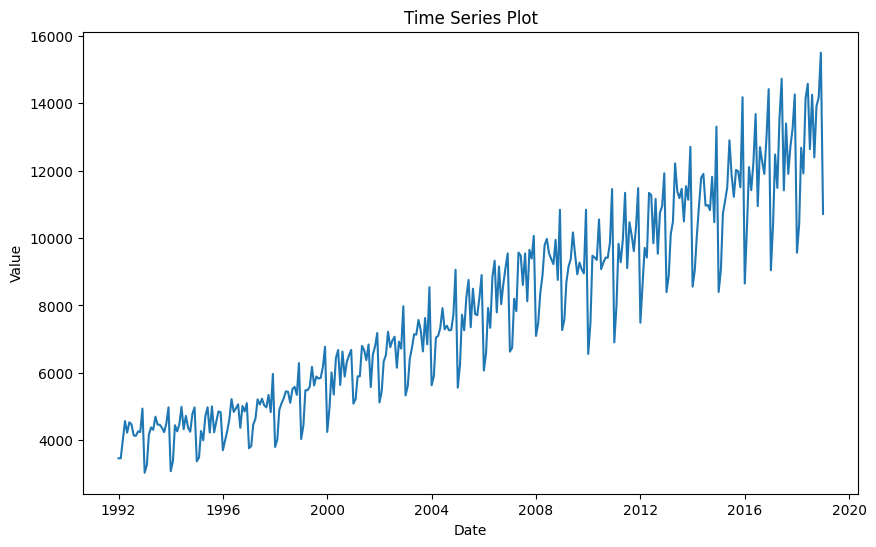

In [232]:
plt.figure(figsize=(10, 6))
plt.plot(alc_data['sales'])
plt.title('Time Series Plot')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

In [233]:
data_a = time_series(alc_data)

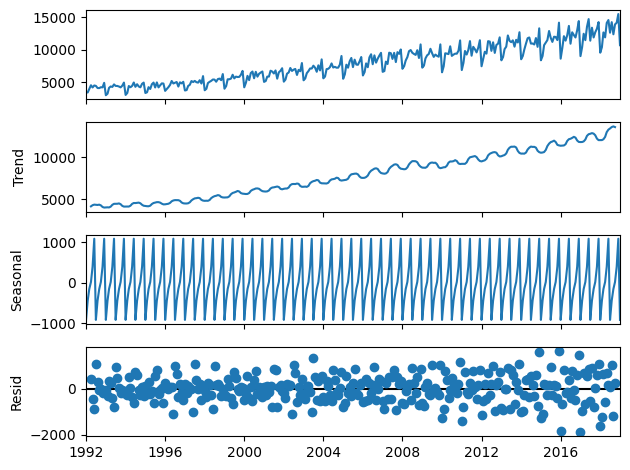

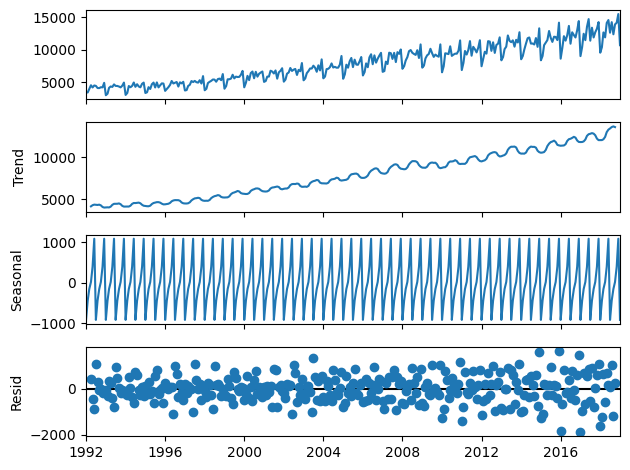

In [234]:
#visually it looks like there is a seasonality and trend
decomposition_temp = seasonal_decompose(alc_data,period=6)
decomposition_temp.plot()

2. Calculate and plot ACF (give visual feedback)

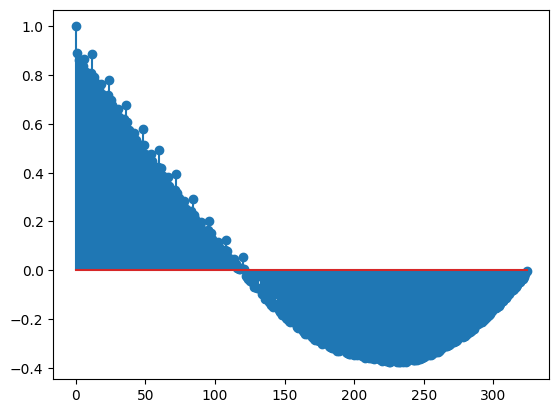

In [235]:
acf_a = data_a.acf()

3. Check, if the time series is stationary (using Augmented Dickey-Fuller (ADF) test)

In [236]:
adf_a = data_a.adf()

ADF statistic: 2.037404725913695
p-value: 0.9987196267088919
The time series is not stationary.


4. If there is the trend - remove it from the Time Series


<Axes: xlabel='DATE'>

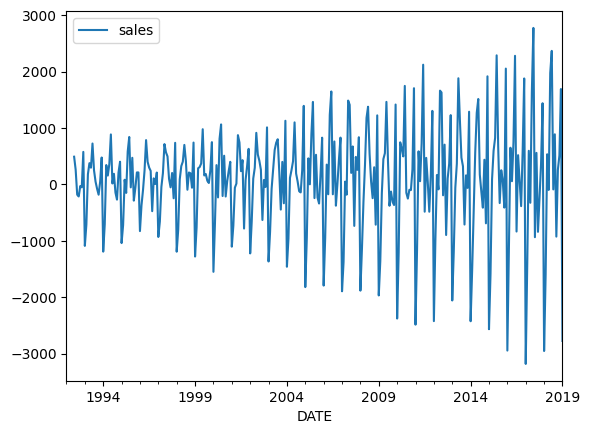

In [237]:
data_b = data_a.remove_trend()
data_b.plot()

5. Check seasonality (visually and using ACF)

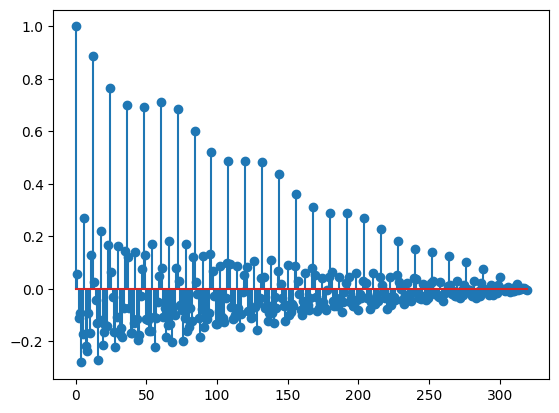

In [238]:
#using seasonal decompose (visually) the seasonal component can be seen
data_b = data_b.dropna()
data_c = time_series(data_b)
acf_c = data_c.acf()

There is visible seasonality, which is seen through seasonal decompose and acf

<Axes: xlabel='DATE'>

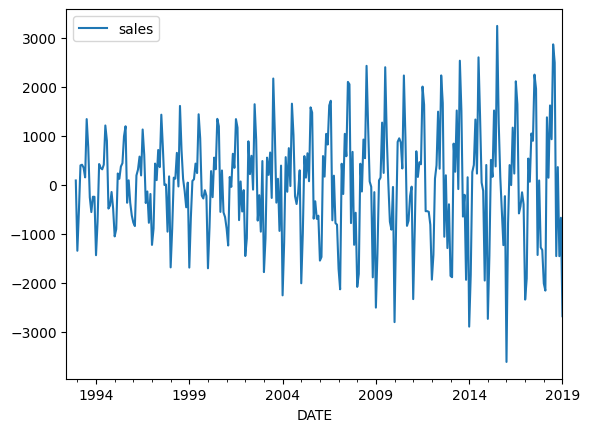

In [239]:
data_d = data_c.remove_season()
data_d.plot()

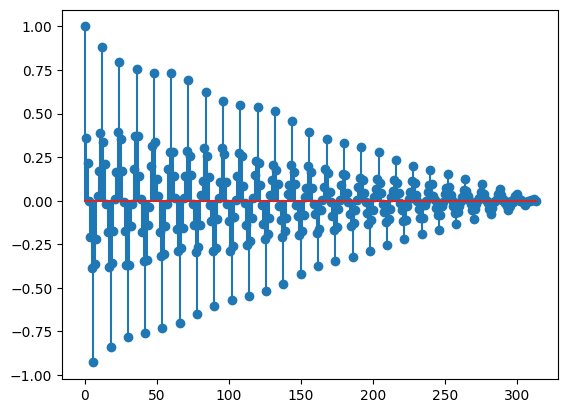

In [240]:
data_d = data_d.dropna()
data_e = time_series(data_d)
acf_e = data_e.acf()

6. Run automatic ARIMA model determination. Find the best model, give summary and display the results (existing time range + future)

In [241]:
#using unmodified data
model_time_org = auto_arima(alc_data,trace=True,suppress_warnings=True)
results_time_org = model_time_org.fit(alc_data)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.83 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5581.852, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5521.140, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5399.757, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5579.946, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5400.180, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5399.909, Time=0.86 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5427.084, Time=0.21 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 5.375 seconds


In [242]:
#predictions
prediction_space_time_org = results_time_org.predict(n_periods = 15)


In [243]:
prediction_space_time_org

2019-02-01    13018.369445
2019-03-01    13047.492034
2019-04-01    13076.614623
2019-05-01    13105.737212
2019-06-01    13134.859800
2019-07-01    13163.982389
2019-08-01    13193.104978
2019-09-01    13222.227567
2019-10-01    13251.350156
2019-11-01    13280.472744
2019-12-01    13309.595333
2020-01-01    13338.717922
2020-02-01    13367.840511
2020-03-01    13396.963100
2020-04-01    13426.085688
Freq: MS, dtype: float64

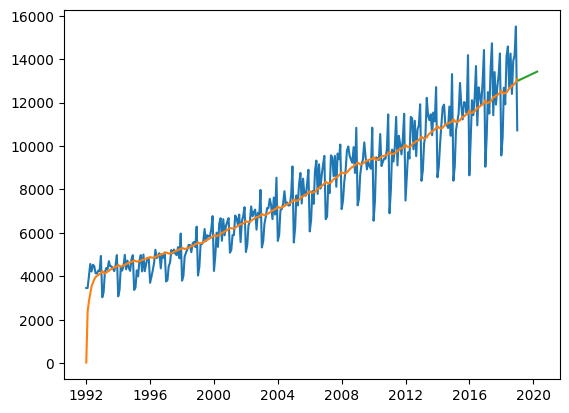

In [244]:
plt.plot(alc_data)
plt.plot(results_time_org.fittedvalues())
plt.plot(prediction_space_time_org)
#using unmodified data, poor fitting and poor predictions

In [245]:
results_time_org.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  325
Model:               SARIMAX(0, 1, 1)   Log Likelihood               -2696.878
Date:                Sun, 23 Jul 2023   AIC                           5399.757
Time:                        22:43:43   BIC                           5411.099
Sample:                    01-01-1992   HQIC                          5404.284
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     29.1226      2.588     11.252      0.000      24.050      34.195
ma.L1         -0.9598      0.018    -53.910      0.000      -0.995      -0.925
sigma2      9.822e+05   6.74e+04     14.578      0.000     8.5e+05    1.11e+06
===================================================================================
Ljung-Box (L1) (Q):                   1.43   Jarque-Bera (JB):                19.75
Prob(Q):                              0.23   Prob(JB):                         0.00
Heteroskedasticity (H):               4.60   Skew:                            -0.42
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [246]:
#data with removed trend and seasonality
model_time = auto_arima(data_d,trace=True,suppress_warnings=True)
results_time = model.fit(data_d)

Performing stepwise search to minimize aic


 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5304.583, Time=0.11 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5262.722, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5273.784, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=5302.584, Time=0.05 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5261.416, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5258.775, Time=0.16 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=5243.102, Time=0.41 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=5218.730, Time=0.61 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.27 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=3.35 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=5216.732, Time=0.44 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=5241.102, Time=0.41 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=3.28 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=2.57 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0

In [247]:
#predictions
prediction_space_time = results_time.predict(n_periods = 15)

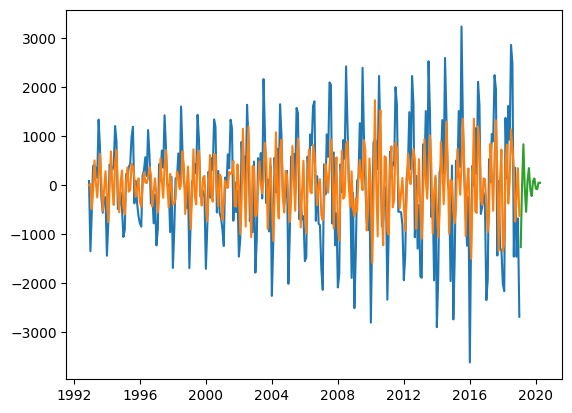

In [248]:
plt.plot(data_d)
plt.plot(results_time.fittedvalues())
plt.plot(prediction_space_time)

In [249]:
results_time.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  314
Model:               SARIMAX(2, 0, 2)   Log Likelihood               -2600.350
Date:                Sun, 23 Jul 2023   AIC                           5210.700
Time:                        22:44:01   BIC                           5229.447
Sample:                    12-01-1992   HQIC                          5218.191
                         - 01-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0994      0.055     -1.796      0.072      -0.208       0.009
ar.L2         -0.6575      0.055    -12.044      0.000      -0.765      -0.551
ma.L1          0.4905      0.024     20.232      0.000       0.443       0.538
ma.L2          0.9426      0.023     40.377      0.000       0.897       0.988
sigma2      9.278e+05   7.83e+04     11.854      0.000    7.74e+05    1.08e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.84   Jarque-Bera (JB):                 1.52
Prob(Q):                              0.36   Prob(JB):                         0.47
Heteroskedasticity (H):               3.82   Skew:                            -0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.06
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: xlabel='DATE'>

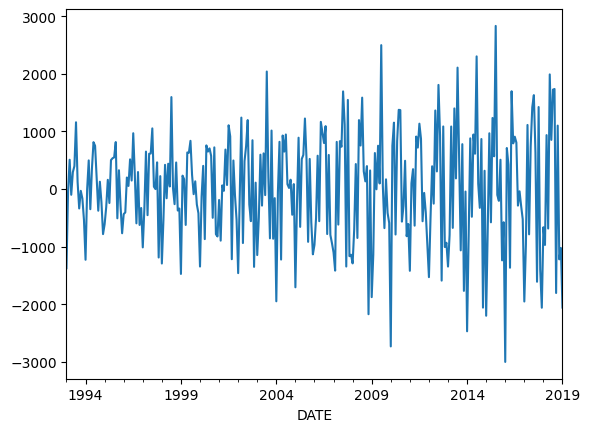

In [250]:
#check residuals
resid = results_time.resid()
resid = resid[1:]
resid.plot()

In [251]:
#minimal correlation, barely above 0.05
correlation_matrix = np.corrcoef(resid[:-1],resid[1:])
correlation_matrix

array([[1.        , 0.05274789],
       [0.05274789, 1.        ]])

With this data, similarly to the passenger data, the model fit was better when trend and seasonality was removed. And similarly, to see what predictiions would actually look like the is a need to 'unprocess' the predictions